<a href="https://colab.research.google.com/github/BeltranPascual/Deep-Learning/blob/master/codigo_en_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’




In [4]:
install.packages('keras', dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘forge’, ‘rappdirs’, ‘config’, ‘tfestimators’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’, ‘tfdatasets’, ‘jpeg’




In [5]:
library(keras)

In [6]:
mnist<-dataset_mnist()
x_train<-mnist$train$x
y_train<-mnist$train$y
x_test<-mnist$test$x
y_test<-mnist$test$y
# reshape
x_train<-array_reshape(x_train, c(nrow(x_train), 784))
x_test<-array_reshape(x_test, c(nrow(x_test), 784))
# rescale
x_train<-x_train/ 255
x_test<-x_test/ 255
y_train<-to_categorical(y_train, 10)
y_test<-to_categorical(y_test, 10)


In [7]:
model<-keras_model_sequential()
model%>%
layer_dense(units= 256, activation= 'relu', input_shape= c(784)) %>%
layer_dropout(rate= 0.4) %>%
layer_dense(units= 128, activation= 'relu') %>%
layer_dropout(rate= 0.3) %>%
layer_dense(units= 10, activation= 'softmax')
summary(model)
model%>% compile(
loss= 'categorical_crossentropy',
optimizer= optimizer_rmsprop(),
metrics= c('accuracy')
)


Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 256)                     200960      
________________________________________________________________________________
dropout (Dropout)                   (None, 256)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     32896       
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 10)                      1290        
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________

In [8]:
history <-model%>% fit(
x_train, y_train,
epochs= 30, batch_size= 128,
validation_split= 0.2
)


`geom_smooth()` using formula 'y ~ x'



loss  accuracy 
0.1105795 0.9810000

[1] 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2
   [37] 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0
   [73] 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 5 9 2 1
  [109] 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1
  [145] 7 1 8 2 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8
  [181] 1 8 5 0 8 9 2 5 0 1 1 1 0 9 0 3 1 6 4 3 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0
  [217] 3 6 5 5 7 2 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 6 4 2 4 1
  [253] 9 5 7 7 2 8 2 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4
  [289] 1 5 8 2 9 2 0 4 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 7 9 3
  [325] 0 4 2 0 7 1 1 2 1 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9
  [361] 4 6 2 2 5 0 6 5 6 3 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5
  [397] 2 5 4 4 2 8 3 8 2 4 5 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8
  [433] 4 5 9 8 8 3 7 6 0 0 3 0 2 0 6 9 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2
  [469] 7 5 8 9 6 1 8 4 1 2 5 9 1 9 7 5 4 0 8 9 9 1 0 5 2 3 7 8 9 4 0 6 3 9 5 2
  [505] 1 3 1 3 6 5 7 4 2 2 6 3 2 6 5 4 8 9 7 1 3 0 3 8 3 1 9 3 4 4 6 4 2 1 8 2
  [541] 5 4 8 8 4 0 0 2 3 2 7 3 0 8 7 4 4 7 9 6 9 0 9 8 0 4 6 0 6 3 5 4 8 3 3 9
  [577] 3 3 3 7 8 0 2 8 1 7 0 6 5 4 3 8 0 9 6 3 8 0 9 9 6 8 6 8 5 7 8 6 0 2 4 0
  [613] 2 2 3 1 9 7 5 1 0 8 4 6 2 6 7 9 3 2 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 2 1
  [649] 3 7 6 7 1 2 5 8 0 3 7 2 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3
  [685] 3 8 3 3 6 7 2 4 5 8 5 1 1 4 4 3 1 0 7 7 0 7 9 4 4 8 5 5 4 0 8 2 1 6 8 4
  [721] 8 0 4 0 6 1 9 3 2 6 7 2 6 9 3 1 4 6 2 5 9 2 0 6 2 1 7 3 4 1 0 5 4 3 1 1
  [757] 7 4 9 9 4 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 8 9 4 1 5
  [793] 3 8 0 3 2 5 1 2 8 3 4 4 0 8 8 3 3 1 7 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 4
  [829] 2 4 2 1 7 9 6 1 1 2 4 8 1 7 7 4 8 0 7 3 1 3 1 0 7 7 0 3 5 5 2 7 6 6 9 2
  [865] 8 3 5 2 2 5 6 0 8 2 9 2 8 8 8 8 7 4 9 5 0 6 6 3 2 1 3 2 2 9 3 0 0 5 7 8
  [901] 3 4 4 6 0 2 9 1 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 7 3 2 3 9 1 7 4 0 3 5 5
  [937] 8 6 5 2 6 7 6 6 3 2 7 9 1 1 7 5 6 4 9 5 1 3 3 4 7 8 9 1 1 6 9 1 4 4 5 4
  [973] 0 6 2 2 3 1 5 1 2 0 3 8 1 2 6 7 1 6 2 3 9 0 1 2 2 0 8 9 9 0 2 5 1 9 7 8
 [1009] 1 0 4 1 7 9 5 4 2 6 8 1 3 7 5 4 4 1 8 1 3 8 1 2 5 8 0 6 2 1 1 2 1 5 3 4
 [1045] 6 9 5 0 9 2 2 4 8 2 1 7 2 4 9 4 4 0 3 9 2 2 3 3 8 3 5 7 3 5 8 1 2 4 4 6
 [1081] 4 9 5 1 0 6 9 5 9 5 9 7 3 8 0 3 7 1 3 6 7 8 5 9 7 9 6 9 6 3 7 4 6 5 3 5
 [1117] 4 7 8 7 8 0 7 6 8 8 7 3 3 1 9 5 2 7 3 5 1 1 2 1 4 7 4 7 5 4 5 4 0 8 3 6
 [1153] 9 6 0 2 8 4 4 4 4 6 6 4 7 9 3 4 5 5 8 7 3 7 2 7 0 2 6 1 1 1 8 9 2 8 7 2
 [1189] 0 1 5 0 9 1 7 0 6 0 8 6 8 1 8 0 3 3 7 2 3 6 2 1 6 1 1 3 7 9 0 8 0 5 4 0
 [1225] 2 8 2 2 9 8 4 0 9 5 8 5 1 2 1 3 1 7 4 5 7 2 0 5 8 8 6 2 5 4 1 9 2 1 5 8
 [1261] 7 0 2 4 4 3 6 8 8 2 4 0 5 0 4 4 7 9 3 4 1 5 9 7 3 5 8 8 0 5 3 3 6 6 0 1
 [1297] 6 0 3 5 4 4 1 2 9 1 4 6 9 9 3 9 8 4 4 3 1 3 1 3 8 7 9 4 8 8 7 9 9 1 4 5
 [1333] 6 0 5 2 2 2 1 5 5 2 4 9 6 2 7 7 2 2 1 1 2 8 3 7 2 4 1 7 1 7 6 7 8 2 7 3
 [1369] 1 7 5 8 2 6 2 2 5 6 5 0 9 2 4 3 3 9 7 6 6 8 0 4 1 3 8 3 9 1 8 0 6 7 2 1
 [1405] 0 5 5 2 0 2 2 0 2 4 9 8 0 9 9 4 6 5 4 9 1 8 3 4 9 9 1 2 2 8 1 9 6 4 0 9
 [1441] 4 8 3 8 6 0 2 5 1 9 6 2 9 4 0 9 6 0 6 2 5 4 2 3 8 4 5 5 0 3 8 5 3 5 8 6
 [1477] 5 7 6 3 3 9 6 1 1 2 9 0 4 3 3 6 9 5 7 3 7 7 7 8 1 9 8 3 0 7 2 7 9 4 5 4
 [1513] 9 3 2 1 4 0 2 3 7 5 9 8 8 5 0 5 1 4 7 5 9 0 0 0 6 6 2 3 7 8 4 7 7 9 2 4
 [1549] 1 6 5 2 4 3 9 1 8 4 0 9 8 4 8 7 7 0 7 8 8 6 0 4 8 8 2 4 7 6 6 6 4 7 1 8
 [1585] 8 2 3 6 3 0 0 3 7 6 9 7 9 9 5 4 3 3 6 1 2 3 7 3 3 6 0 8 3 8 4 3 6 3 5 0
 [1621] 2 0 9 0 7 4 6 9 3 5 1 9 6 1 4 5 4 5 0 5 9 5 2 1 2 9 1 9 9 4 0 8 4 5 2 9
 [1657] 2 1 2 1 7 3 6 8 8 4 9 1 9 8 5 7 5 1 1 8 6 5 2 4 4 7 2 3 5 6 8 8 6 2 3 1
 [1693] 0 5 8 9 2 9 6 7 0 4 8 7 1 7 4 1 0 3 7 2 0 0 9 1 7 8 7 8 4 7 2 0 4 6 0 3
 [1729] 1 1 3 3 9 6 7 4 1 5 3 0 8 7 3 9 6 9 3 5 0 2 7 4 5 1 2 5 8 0 8 8 1 5 0 3
 [1765] 0 3 1 4 0 3 7 2 7 1 8 0 7 0 4 3 1 9 8 7 7 1 4 9 9 3 8 1 7 9 0 2 0 3 3 7
 [18

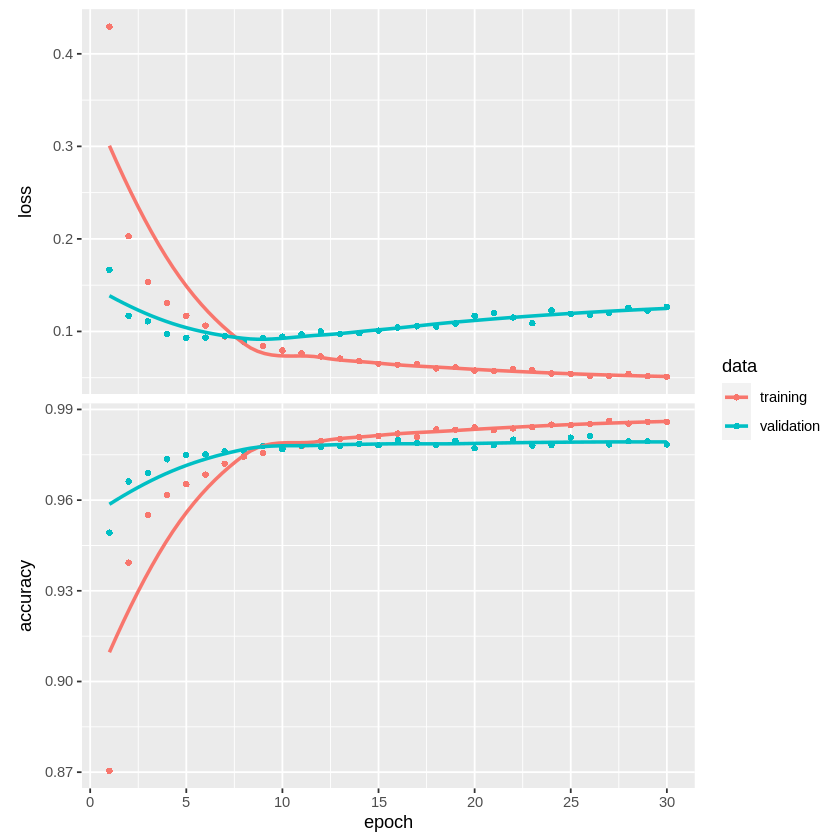

In [9]:
plot(history)
model%>% evaluate(x_test, y_test)
model%>% predict_classes(x_test)
